In [47]:
import requests
import pandas as pd

def feature_framing(url):
    """
    Fetches and processes protein feature data from a UniProt JSON API.
    
    Args:
    url (str): API URL to fetch protein feature data
    
    Returns:
    pd.DataFrame: DataFrame containing protein features
    """
    # Make the GET request to fetch the data
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()  # Parse the JSON response
    else:
        print("Failed to retrieve data:", response.status_code)
        return None

    # Extract the 'features' part of the JSON
    features = data.get('features', [])
    
    # Prepare a list of feature data
    feature_data = []
    for feature in features:
        feature_entry = {
            'type': feature.get('type'),
            'description': feature.get('description'),
            'start': feature.get('location', {}).get('start', {}).get('value'),
            'end': feature.get('location', {}).get('end', {}).get('value'),
        }
        feature_data.append(feature_entry)
    
    # Convert the list of feature data into a pandas DataFrame
    df_features = pd.DataFrame(feature_data)
    
    return df_features


In [48]:
import requests
import pandas as pd

def genome_coordinate(url):
    """
    Fetches and processes genomic coordinate data from the given API.
    
    Args:
    url (str): API URL to fetch genomic coordinate data
    
    Returns:
    pd.DataFrame: DataFrame containing genomic coordinate data
    """
    # Send GET request to fetch the data
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()  # Parse the JSON response
    else:
        print("Failed to retrieve data:", response.status_code)
        return None

    # Extract the relevant fields: protein name and coordinates
    protein_name = data.get('protein', {}).get('recommendedName', {}).get('fullName', 'Unknown Protein')
    gn_coordinates = data.get('gnCoordinate', [])

    # List to hold flattened genomic data
    coordinates_data = []

    for coord in gn_coordinates:
        protein_id = protein_name  # Using the protein name as an identifier
        for exon in coord.get('genomicLocation', {}).get('exon', []):
            # Extracting genomic and protein locations
            protein_begin = exon.get('proteinLocation', {}).get('begin', {}).get('position')
            protein_end = exon.get('proteinLocation', {}).get('end', {}).get('position')
            genome_begin = exon.get('genomeLocation', {}).get('begin', {}).get('position')
            genome_end = exon.get('genomeLocation', {}).get('end', {}).get('position')

            coordinates_data.append({
                'protein_id': protein_id, 
                'protein_begin': protein_begin,
                'protein_end': protein_end,
                'genome_begin': genome_begin,
                'genome_end': genome_end
            })
    
    # Convert the list of extracted data into a DataFrame
    df_genome = pd.DataFrame(coordinates_data)
    
    return df_genome


In [49]:
import pandas as pd

def extract_pdb(pdb_file):
    """
    Parses a PDB file and extracts atomic data into a DataFrame.
    
    Args:
    pdb_file (str): Path to the PDB file
    
    Returns:
    pd.DataFrame: DataFrame containing atomic data from the PDB file
    """
    # Lists to store data for the dataframe
    atom_data = []

    # Open the PDB file and parse it line by line
    with open(pdb_file, 'r') as file:
        for line in file:
            # Only parse lines that start with "ATOM" or "HETATM"
            if line.startswith("ATOM") or line.startswith("HETATM"):
                atom_serial = int(line[6:11].strip())  # Atom serial number
                atom_name = line[12:16].strip()       # Atom name
                res_name = line[17:20].strip()        # Residue name
                chain_id = line[21].strip()           # Chain identifier
                res_seq = int(line[22:26].strip())    # Residue sequence number
                x_coord = float(line[30:38].strip())  # X coordinate
                y_coord = float(line[38:46].strip())  # Y coordinate
                z_coord = float(line[46:54].strip())  # Z coordinate
                occupancy = float(line[54:60].strip()) # Occupancy
                temp_factor = float(line[60:66].strip()) # Temperature factor

                # Append the extracted data to the atom_data list
                atom_data.append([atom_serial, atom_name, res_name, chain_id, res_seq, x_coord, y_coord, z_coord, occupancy, temp_factor])

    # Create a DataFrame from the collected data
    columns = ['Atom Serial', 'Atom Name', 'Residue Name', 'Chain ID', 'Residue Sequence', 'X Coordinate', 'Y Coordinate', 'Z Coordinate', 'Occupancy', 'Temperature Factor']
    df_pdb = pd.DataFrame(atom_data, columns=columns)
    
    return df_pdb


In [50]:
# Links:



In [51]:
df1_features = feature_framing("https://rest.uniprot.org/uniprotkb/Q96LT7.json?fields=ft_var_seq%2Cft_variant%2Cft_non_cons%2Cft_non_std%2Cft_non_ter%2Cft_conflict%2Cft_unsure%2Cft_act_site%2Cft_binding%2Cft_dna_bind%2Cft_site%2Cft_mutagen%2Cft_intramem%2Cft_topo_dom%2Cft_transmem%2Cft_chain%2Cft_crosslnk%2Cft_disulfid%2Cft_carbohyd%2Cft_init_met%2Cft_lipid%2Cft_mod_res%2Cft_peptide%2Cft_propep%2Cft_signal%2Cft_transit%2Cft_strand%2Cft_helix%2Cft_turn%2Cft_coiled%2Cft_compbias%2Cft_domain%2Cft_motif%2Cft_region%2Cft_repeat%2Cft_zn_fing")
df1_genome = genome_coordinate("https://www.ebi.ac.uk/proteins/api/coordinates/Q96LT7?format=json")
df1_pdb = extract_pdb("./AF-Q96LT7-F1-model_v4.pdb")

In [52]:
df2_features = feature_framing("https://rest.uniprot.org/uniprotkb/Q9Y6H5.json?fields=ft_var_seq%2Cft_variant%2Cft_non_cons%2Cft_non_std%2Cft_non_ter%2Cft_conflict%2Cft_unsure%2Cft_act_site%2Cft_binding%2Cft_dna_bind%2Cft_site%2Cft_mutagen%2Cft_intramem%2Cft_topo_dom%2Cft_transmem%2Cft_chain%2Cft_crosslnk%2Cft_disulfid%2Cft_carbohyd%2Cft_init_met%2Cft_lipid%2Cft_mod_res%2Cft_peptide%2Cft_propep%2Cft_signal%2Cft_transit%2Cft_strand%2Cft_helix%2Cft_turn%2Cft_coiled%2Cft_compbias%2Cft_domain%2Cft_motif%2Cft_region%2Cft_repeat%2Cft_zn_fing")
df2_genome = genome_coordinate("https://www.ebi.ac.uk/proteins/api/coordinates/Q9Y6H5?format=json")
df2_pdb = extract_pdb("./AF-Q9Y6H5-F1-model_v4.pdb")

In [53]:
df3_features = feature_framing("https://rest.uniprot.org/uniprotkb/P37840.json?fields=ft_var_seq%2Cft_variant%2Cft_non_cons%2Cft_non_std%2Cft_non_ter%2Cft_conflict%2Cft_unsure%2Cft_act_site%2Cft_binding%2Cft_dna_bind%2Cft_site%2Cft_mutagen%2Cft_intramem%2Cft_topo_dom%2Cft_transmem%2Cft_chain%2Cft_crosslnk%2Cft_disulfid%2Cft_carbohyd%2Cft_init_met%2Cft_lipid%2Cft_mod_res%2Cft_peptide%2Cft_propep%2Cft_signal%2Cft_transit%2Cft_strand%2Cft_helix%2Cft_turn%2Cft_coiled%2Cft_compbias%2Cft_domain%2Cft_motif%2Cft_region%2Cft_repeat%2Cft_zn_fing")
df3_genome = genome_coordinate("https://www.ebi.ac.uk/proteins/api/coordinates/P37840?format=json")
df3_pdb = extract_pdb("./AF-P37840-F1-model_v4.pdb")

In [54]:
df4_features = feature_framing("https://rest.uniprot.org/uniprotkb/O60260.json?fields=ft_var_seq%2Cft_variant%2Cft_non_cons%2Cft_non_std%2Cft_non_ter%2Cft_conflict%2Cft_unsure%2Cft_act_site%2Cft_binding%2Cft_dna_bind%2Cft_site%2Cft_mutagen%2Cft_intramem%2Cft_topo_dom%2Cft_transmem%2Cft_chain%2Cft_crosslnk%2Cft_disulfid%2Cft_carbohyd%2Cft_init_met%2Cft_lipid%2Cft_mod_res%2Cft_peptide%2Cft_propep%2Cft_signal%2Cft_transit%2Cft_strand%2Cft_helix%2Cft_turn%2Cft_coiled%2Cft_compbias%2Cft_domain%2Cft_motif%2Cft_region%2Cft_repeat%2Cft_zn_fing")
df4_genome = genome_coordinate("https://www.ebi.ac.uk/proteins/api/coordinates/O60260?format=json")
df4_pdb = extract_pdb("./AF-O60260-F1-model_v4 (3).pdb")

In [55]:
df5_features = feature_framing("https://rest.uniprot.org/uniprotkb/Q99497.json?fields=ft_var_seq%2Cft_variant%2Cft_non_cons%2Cft_non_std%2Cft_non_ter%2Cft_conflict%2Cft_unsure%2Cft_act_site%2Cft_binding%2Cft_dna_bind%2Cft_site%2Cft_mutagen%2Cft_intramem%2Cft_topo_dom%2Cft_transmem%2Cft_chain%2Cft_crosslnk%2Cft_disulfid%2Cft_carbohyd%2Cft_init_met%2Cft_lipid%2Cft_mod_res%2Cft_peptide%2Cft_propep%2Cft_signal%2Cft_transit%2Cft_strand%2Cft_helix%2Cft_turn%2Cft_coiled%2Cft_compbias%2Cft_domain%2Cft_motif%2Cft_region%2Cft_repeat%2Cft_zn_fing")
df5_genome = genome_coordinate("https://www.ebi.ac.uk/proteins/api/coordinates/Q99497?format=json")
df5_pdb = extract_pdb("./AF-Q99497-F1-model_v4.pdb")

In [56]:
df6_features = feature_framing("https://rest.uniprot.org/uniprotkb/Q5S007.json?fields=ft_var_seq%2Cft_variant%2Cft_non_cons%2Cft_non_std%2Cft_non_ter%2Cft_conflict%2Cft_unsure%2Cft_act_site%2Cft_binding%2Cft_dna_bind%2Cft_site%2Cft_mutagen%2Cft_intramem%2Cft_topo_dom%2Cft_transmem%2Cft_chain%2Cft_crosslnk%2Cft_disulfid%2Cft_carbohyd%2Cft_init_met%2Cft_lipid%2Cft_mod_res%2Cft_peptide%2Cft_propep%2Cft_signal%2Cft_transit%2Cft_strand%2Cft_helix%2Cft_turn%2Cft_coiled%2Cft_compbias%2Cft_domain%2Cft_motif%2Cft_region%2Cft_repeat%2Cft_zn_fing")
df6_genome = genome_coordinate("https://www.ebi.ac.uk/proteins/api/coordinates/Q5S007?format=json")
df6_pdb = extract_pdb("./AF-Q5S007-F1-model_v4.pdb")

In [57]:
df7_features = feature_framing("https://rest.uniprot.org/uniprotkb/P04062.json?fields=ft_var_seq%2Cft_variant%2Cft_non_cons%2Cft_non_std%2Cft_non_ter%2Cft_conflict%2Cft_unsure%2Cft_act_site%2Cft_binding%2Cft_dna_bind%2Cft_site%2Cft_mutagen%2Cft_intramem%2Cft_topo_dom%2Cft_transmem%2Cft_chain%2Cft_crosslnk%2Cft_disulfid%2Cft_carbohyd%2Cft_init_met%2Cft_lipid%2Cft_mod_res%2Cft_peptide%2Cft_propep%2Cft_signal%2Cft_transit%2Cft_strand%2Cft_helix%2Cft_turn%2Cft_coiled%2Cft_compbias%2Cft_domain%2Cft_motif%2Cft_region%2Cft_repeat%2Cft_zn_fing")
df7_genome = genome_coordinate("https://www.ebi.ac.uk/proteins/api/coordinates/P04062?format=json")
df7_pdb = extract_pdb("./AF-P04062-F1-model_v4.pdb")

In [58]:
df8_features = feature_framing("https://rest.uniprot.org/uniprotkb/P10636.json?fields=ft_var_seq%2Cft_variant%2Cft_non_cons%2Cft_non_std%2Cft_non_ter%2Cft_conflict%2Cft_unsure%2Cft_act_site%2Cft_binding%2Cft_dna_bind%2Cft_site%2Cft_mutagen%2Cft_intramem%2Cft_topo_dom%2Cft_transmem%2Cft_chain%2Cft_crosslnk%2Cft_disulfid%2Cft_carbohyd%2Cft_init_met%2Cft_lipid%2Cft_mod_res%2Cft_peptide%2Cft_propep%2Cft_signal%2Cft_transit%2Cft_strand%2Cft_helix%2Cft_turn%2Cft_coiled%2Cft_compbias%2Cft_domain%2Cft_motif%2Cft_region%2Cft_repeat%2Cft_zn_fing")
df8_genome = genome_coordinate("https://www.ebi.ac.uk/proteins/api/coordinates/P10636?format=json")
df8_pdb = extract_pdb("./AF-P10636-F1-model_v4.pdb")

In [59]:
df9_features = feature_framing("https://rest.uniprot.org/uniprotkb/Q13148.json?fields=ft_var_seq%2Cft_variant%2Cft_non_cons%2Cft_non_std%2Cft_non_ter%2Cft_conflict%2Cft_unsure%2Cft_act_site%2Cft_binding%2Cft_dna_bind%2Cft_site%2Cft_mutagen%2Cft_intramem%2Cft_topo_dom%2Cft_transmem%2Cft_chain%2Cft_crosslnk%2Cft_disulfid%2Cft_carbohyd%2Cft_init_met%2Cft_lipid%2Cft_mod_res%2Cft_peptide%2Cft_propep%2Cft_signal%2Cft_transit%2Cft_strand%2Cft_helix%2Cft_turn%2Cft_coiled%2Cft_compbias%2Cft_domain%2Cft_motif%2Cft_region%2Cft_repeat%2Cft_zn_fing")
df9_genome = genome_coordinate("https://www.ebi.ac.uk/proteins/api/coordinates/Q13148?format=json")
df9_pdb = extract_pdb("./AF-Q13148-F1-model_v4.pdb")

In [60]:
df10_features = feature_framing("https://rest.uniprot.org/uniprotkb/P05067.json?fields=ft_var_seq%2Cft_variant%2Cft_non_cons%2Cft_non_std%2Cft_non_ter%2Cft_conflict%2Cft_unsure%2Cft_act_site%2Cft_binding%2Cft_dna_bind%2Cft_site%2Cft_mutagen%2Cft_intramem%2Cft_topo_dom%2Cft_transmem%2Cft_chain%2Cft_crosslnk%2Cft_disulfid%2Cft_carbohyd%2Cft_init_met%2Cft_lipid%2Cft_mod_res%2Cft_peptide%2Cft_propep%2Cft_signal%2Cft_transit%2Cft_strand%2Cft_helix%2Cft_turn%2Cft_coiled%2Cft_compbias%2Cft_domain%2Cft_motif%2Cft_region%2Cft_repeat%2Cft_zn_fing")
df10_genome = genome_coordinate("https://www.ebi.ac.uk/proteins/api/coordinates/P05067?format=json")
df10_pdb = extract_pdb("./AF-P05067-F1-model_v4.pdb")

In [61]:
df11_features = feature_framing("https://rest.uniprot.org/uniprotkb/P42858.json?fields=ft_var_seq%2Cft_variant%2Cft_non_cons%2Cft_non_std%2Cft_non_ter%2Cft_conflict%2Cft_unsure%2Cft_act_site%2Cft_binding%2Cft_dna_bind%2Cft_site%2Cft_mutagen%2Cft_intramem%2Cft_topo_dom%2Cft_transmem%2Cft_chain%2Cft_crosslnk%2Cft_disulfid%2Cft_carbohyd%2Cft_init_met%2Cft_lipid%2Cft_mod_res%2Cft_peptide%2Cft_propep%2Cft_signal%2Cft_transit%2Cft_strand%2Cft_helix%2Cft_turn%2Cft_coiled%2Cft_compbias%2Cft_domain%2Cft_motif%2Cft_region%2Cft_repeat%2Cft_zn_fing")
df11_genome = genome_coordinate("https://www.ebi.ac.uk/proteins/api/coordinates/P42858?format=json")


In [62]:
!pip install py3Dmol

In [63]:
import py3Dmol

# List of PDB file paths
pdb_files = [
    './AF-O60260-F1-model_v4 (3).pdb',
    './AF-P04062-F1-model_v4.pdb',
    './AF-P05067-F1-model_v4.pdb',
    './AF-P10636-F1-model_v4.pdb',
    './AF-P37840-F1-model_v4.pdb',
    './AF-Q13148-F1-model_v4.pdb',
    './AF-Q5S007-F1-model_v4.pdb',
    './AF-Q96LT7-F1-model_v4.pdb',
    './AF-Q99497-F1-model_v4.pdb',
    './AF-Q9Y6H5-F1-model_v4.pdb'
]

# Loop through each file
for pdb_file in pdb_files:
        # Create a 3D visualization for each PDB file
        viewer = py3Dmol.view(width=800, height=600)
        with open(pdb_file, 'r') as file:
            pdb_data = file.read()
            viewer.addModel(pdb_data, 'pdb')  # Load the PDB file
        viewer.setStyle({'stick': {}})
        viewer.zoomTo()
        viewer.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [64]:
df1_genome.head()

protein_id  protein_begin  protein_end  \
0  Guanine nucleotide exchange factor C9orf72              1          148   
1  Guanine nucleotide exchange factor C9orf72            149          168   
2  Guanine nucleotide exchange factor C9orf72            169          200   
3  Guanine nucleotide exchange factor C9orf72            201          222   
4  Guanine nucleotide exchange factor C9orf72            222          246   

   genome_begin  genome_end  
0      27567120    27566677  
1      27565590    27565531  
2      27562476    27562381  
3      27561649    27561585  
4      27560299    27560227

In [65]:
df1_pdb.head()

Atom Serial Atom Name Residue Name Chain ID  Residue Sequence  \
0            1         N          MET        A                 1   
1            2        CA          MET        A                 1   
2            3         C          MET        A                 1   
3            4        CB          MET        A                 1   
4            5         O          MET        A                 1   

   X Coordinate  Y Coordinate  Z Coordinate  Occupancy  Temperature Factor  
0        29.009       -17.957       -47.178        1.0               36.46  
1        29.753       -17.060       -46.271        1.0               36.46  
2        28.820       -16.681       -45.139        1.0               36.46  
3        30.269       -15.807       -46.992        1.0               36.46  
4        27.669       -16.394       -45.426        1.0               36.46

In [66]:
!pip install deap

In [67]:
# Assuming you have a list of dataframes like:
genome_dataframes = [df1_genome, df2_genome, df3_genome, df4_genome, df5_genome, df6_genome, df7_genome, df8_genome, df9_genome, df10_genome]
pdb_dataframes = [df1_pdb, df2_pdb, df3_pdb, df4_pdb, df5_pdb, df6_pdb, df7_pdb, df8_pdb, df9_pdb, df10_pdb]

In [68]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

# Function to preprocess all genome dataframes
def preprocess_all_genomes(genome_dataframes):
    processed_genomes = []
    scaler = StandardScaler()
    for genome_data in genome_dataframes:
        # Extract relevant features
        genome_features = genome_data[['protein_begin', 'protein_end', 'genome_begin', 'genome_end']].values
        # Scale the features
        scaled_features = scaler.fit_transform(genome_features)
        # Convert back to DataFrame
        processed_genomes.append(pd.DataFrame(scaled_features, columns=['protein_begin', 'protein_end', 'genome_begin', 'genome_end']))
    return processed_genomes

# Function to preprocess all PDB dataframes
def preprocess_all_pdbs(pdb_dataframes):
    processed_pdbs = []
    for pdb_data in pdb_dataframes:
        # Extract atomic coordinates
        coords = pdb_data[['X Coordinate', 'Y Coordinate', 'Z Coordinate']].values
        # Calculate pairwise distances
        pairwise_distances = squareform(pdist(coords))
        # Convert to DataFrame for consistency
        processed_pdbs.append(pd.DataFrame(pairwise_distances))
    return processed_pdbs


In [69]:
# Preprocess all genome and pdb dataframes
processed_genomes = preprocess_all_genomes(genome_dataframes)
processed_pdbs = preprocess_all_pdbs(pdb_dataframes)

# Verify outputs
print(f"Processed Genomes: {len(processed_genomes)}")
print(f"First Genome Processed Type: {type(processed_genomes[0])}")
print(f"First Genome Processed Shape: {processed_genomes[0].shape}")

print(f"Processed PDBs: {len(processed_pdbs)}")
print(f"First PDB Processed Type: {type(processed_pdbs[0])}")
print(f"First PDB Processed Shape: {processed_pdbs[0].shape}")


Processed Genomes: 10
First Genome Processed Type: <class 'pandas.core.frame.DataFrame'>
First Genome Processed Shape: (20, 4)
Processed PDBs: 10
First PDB Processed Type: <class 'pandas.core.frame.DataFrame'>
First PDB Processed Shape: (3820, 3820)


In [70]:
processed_genome = processed_genomes[0]  # Shape: (20, 4)
processed_pdb = processed_pdbs[0]  # Shape: (3820, 3820)

In [71]:
import pennylane as qml
import numpy as np
import pandas as pd

# Define the quantum circuit
def vqe_circuit(params, n_qubits):
    """
    Define a simple ansatz for the VQE circuit.
    Args:
        params (array): Parameters for the circuit.
        n_qubits (int): Number of qubits.
    """
    for i in range(n_qubits):
        qml.RX(params[i], wires=i)
        qml.RY(params[i + n_qubits], wires=i)
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i + 1])

# Compute the Hamiltonian for genome
def compute_hamiltonian(data):
    """
    Compute a toy Hamiltonian based on processed data.
    Args:
        data (pd.DataFrame): Processed data as a DataFrame.
    Returns:
        qml.Hamiltonian: The resulting Hamiltonian.
    """
    coeffs = data.sum(axis=1).values
    # Cap the number of qubits for scalability
    num_qubits = min(len(coeffs), 10)  # Use at most 10 qubits as an example
    coeffs = coeffs[:num_qubits]
    observables = [qml.PauliZ(i) for i in range(num_qubits)]
    return qml.Hamiltonian(coeffs, observables), num_qubits

# Qubit tapering and reduction
def reduce_qubits(hamiltonian, max_qubits=10):
    """
    Apply qubit tapering/reduction to simplify the Hamiltonian.
    Args:
        hamiltonian (qml.Hamiltonian): The Hamiltonian to reduce.
        max_qubits (int): Maximum number of qubits to retain.
    Returns:
        Tuple: Reduced Hamiltonian and number of qubits.
    """
    num_qubits = len(hamiltonian.coeffs)
    reduced_qubits = min(max_qubits, num_qubits)
    coeffs = hamiltonian.coeffs[:reduced_qubits]
    observables = hamiltonian.ops[:reduced_qubits]
    return qml.Hamiltonian(coeffs, observables), reduced_qubits

# Create VQE device
def create_vqe_device(n_qubits):
    """
    Create a PennyLane device for VQE.
    Args:
        n_qubits (int): Number of qubits.
    Returns:
        Device: The PennyLane device.
    """
    return qml.device("default.qubit", wires=n_qubits)

# VQE cost function
def vqe_cost_fn(params, hamiltonian, device):
    """
    Compute the cost function for VQE.
    Args:
        params (array): Parameters for the VQE circuit.
        hamiltonian (qml.Hamiltonian): The Hamiltonian.
        device (qml.Device): The PennyLane device.
    Returns:
        float: The cost (energy expectation value).
    """
    @qml.qnode(device)
    def circuit(params):
        vqe_circuit(params, len(hamiltonian.coeffs))
        return qml.expval(hamiltonian)
    return circuit(params)

# Generate initial population
def generate_initial_population(pop_size, n_params):
    """
    Generate an initial population for the genetic algorithm.
    Args:
        pop_size (int): Population size.
        n_params (int): Number of parameters per individual.
    Returns:
        list: A list of individuals.
    """
    return [np.random.uniform(low=-np.pi, high=np.pi, size=n_params) for _ in range(pop_size)]

# Evaluate population
def evaluate_population(population, hamiltonian, device):
    """
    Evaluate the fitness of the population.
    Args:
        population (list): Population of parameter sets.
        hamiltonian (qml.Hamiltonian): The Hamiltonian.
        device (qml.Device): The PennyLane device.
    Returns:
        list: Fitness values for the population.
    """
    return np.array([vqe_cost_fn(params, hamiltonian, device) for params in population])

# Perform crossover
def crossover(parent1, parent2):
    """
    Perform crossover between two parents.
    Args:
        parent1 (array): The first parent.
        parent2 (array): The second parent.
    Returns:
        array: The offspring.
    """
    crossover_point = np.random.randint(0, len(parent1))
    return np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))

# Perform mutation
def mutate(individual, mutation_rate):
    """
    Mutate an individual.
    Args:
        individual (array): The individual to mutate.
        mutation_rate (float): Mutation rate.
    Returns:
        array: The mutated individual.
    """
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] += np.random.uniform(-0.1, 0.1)
    return individual

# Genetic algorithm optimization
def optimize_vqe_with_ga(processed_genome, processed_pdb, pop_size=10, generations=20, mutation_rate=0.1):
    """
    Optimize the VQE circuit parameters using a genetic algorithm.
    Args:
        processed_genome (pd.DataFrame): Processed genome data as a DataFrame.
        processed_pdb (pd.DataFrame): Processed PDB data as a DataFrame.
        pop_size (int): Population size.
        generations (int): Number of generations.
        mutation_rate (float): Mutation rate.
    Returns:
        tuple: Best parameters and energy.
    """
    # Compute Hamiltonians
    genome_hamiltonian, n_qubits_genome = compute_hamiltonian(processed_genome)
    pdb_hamiltonian, n_qubits_pdb = compute_hamiltonian(processed_pdb)

    # Create devices
    genome_device = create_vqe_device(n_qubits_genome)
    pdb_device = create_vqe_device(n_qubits_pdb)

    # Generate initial population
    param_count_genome = 2 * n_qubits_genome
    param_count_pdb = 2 * n_qubits_pdb
    population_genome = generate_initial_population(pop_size, param_count_genome)
    population_pdb = generate_initial_population(pop_size, param_count_pdb)

    # Optimization loop
    for _ in range(generations):
        genome_fitness = evaluate_population(population_genome, genome_hamiltonian, genome_device)
        pdb_fitness = evaluate_population(population_pdb, pdb_hamiltonian, pdb_device)

        # Combine fitness scores
        fitness = genome_fitness + pdb_fitness

        # Sort and select best individuals
        sorted_indices = np.argsort(fitness)
        population_genome = [population_genome[i] for i in sorted_indices[:pop_size // 2]]
        population_pdb = [population_pdb[i] for i in sorted_indices[:pop_size // 2]]

        # Perform crossover and mutation
        offspring_genome = []
        offspring_pdb = []
        for _ in range(pop_size // 2):
            indices_genome = np.random.choice(len(population_genome), 2, replace=False)
            indices_pdb = np.random.choice(len(population_pdb), 2, replace=False)

            parent1_genome, parent2_genome = population_genome[indices_genome[0]], population_genome[indices_genome[1]]
            parent1_pdb, parent2_pdb = population_pdb[indices_pdb[0]], population_pdb[indices_pdb[1]]

            child_genome = crossover(parent1_genome, parent2_genome)
            child_pdb = crossover(parent1_pdb, parent2_pdb)

            child_genome = mutate(child_genome, mutation_rate)
            child_pdb = mutate(child_pdb, mutation_rate)

            offspring_genome.append(child_genome)
            offspring_pdb.append(child_pdb)

        population_genome += offspring_genome
        population_pdb += offspring_pdb

    best_params_genome = population_genome[0]
    best_params_pdb = population_pdb[0]
    best_energy = fitness[sorted_indices[0]]

    return best_params_genome, best_params_pdb, best_energy


In [72]:
processed_genome = processed_genomes[0] 
processed_pdb = processed_pdbs[0]

result = optimize_vqe_with_ga(processed_genome, processed_pdb)

# Display the result
print("\nResult for the protein:")
print(result)


Result for the protein:
(array([ 1.04182474,  2.09928223, -0.40788224, -0.27646375, -2.00634189,
       -0.94382684,  0.84690804, -2.39791608,  0.0223822 ,  1.56818469,
        2.1531758 , -2.92877423,  2.73941995,  0.6503779 ,  1.64549998,
        0.47668737, -2.63807558,  0.83541119, -1.57304638,  0.45288408]), array([-0.2747889 , -0.74868882, -2.55982183,  0.35335319,  2.75343005,
        1.95984084,  1.83879757, -2.66669504,  1.83631846, -2.69015027,
        2.83216156,  0.4789568 ,  2.53956489, -2.67354162, -0.29132418,
        2.10862395,  2.34525653, -1.58946268, -1.89032789,  1.43468321]), -436129.74141213775)


In [73]:
processed_genome = processed_genomes[1] 
processed_pdb = processed_pdbs[1]

result = optimize_vqe_with_ga(processed_genome, processed_pdb)

# Display the result
print("\nResult for the protein:")
print(result)


Result for the protein:
(array([-2.42689263, -1.14793612,  0.07244706,  2.63471669,  1.63072323,
       -1.46558321,  0.94509223,  0.83985706, -0.60863607,  0.05206457,
        1.82582567,  3.02153607,  2.72770272, -2.97035458, -0.74312943,
       -2.77619325,  0.01554739,  0.71199594,  2.83069367,  2.03480798]), array([-2.55487671, -2.32167754,  2.63765052, -0.77127016, -1.26210922,
        0.82880429, -0.882942  , -2.22902563, -0.86961985, -1.76458889,
        0.43932096,  2.93709323,  1.37096079,  0.98030583,  1.6663352 ,
        1.02363616, -2.23470496, -2.36063602, -1.53924612,  2.83027732]), -591763.1273290933)


In [74]:
import pandas as pd

# Initialize a list to store the results
results = []

# Loop through each processed genome and pdb
for i in range(len(processed_genomes)):
    processed_genome = processed_genomes[i]
    processed_pdb = processed_pdbs[i]
    
    # Optimize using the genetic algorithm for VQE
    result = optimize_vqe_with_ga(processed_genome, processed_pdb)
    
    # Extract the best parameters and energy
    best_params_genome, best_params_pdb, best_energy = result
    
    # Store the result for the current protein in the results list
    results.append({
        "Protein Index": i,
        "Best Parameters Genome": best_params_genome,
        "Best Parameters PDB": best_params_pdb,
        "Best Energy": best_energy
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)



In [75]:
results_df.head()

Protein Index                             Best Parameters Genome  \
0              0  [-1.5908970577321686, 1.125119186882803, -2.19...   
1              1  [-2.7990398879932004, -2.8646147825168105, 2.3...   
2              2  [1.62509344760364, 1.482681690854342, -2.77255...   
3              3  [-2.028343344154945, 0.19197974737678256, -0.5...   
4              4  [2.2654696667446745, -2.149282741157254, -1.62...   

                                 Best Parameters PDB    Best Energy  
0  [0.19528646252370324, -3.060755752080204, -1.8... -232525.243700  
1  [3.0243396102273854, 3.0897859314439717, 2.262... -509372.298467  
2  [0.8529021130757101, -0.3612934793895316, 2.33... -162612.699998  
3  [-3.130147576520754, -2.4870602958661254, -0.3... -222753.778383  
4  [0.032318176966695714, 1.256458237613696, -0.6...  -48388.399836

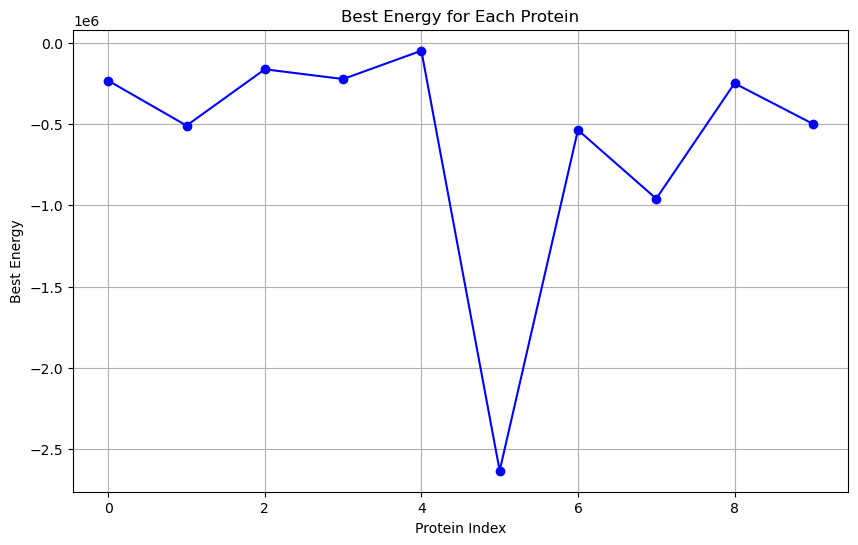

In [76]:
import matplotlib.pyplot as plt

# Plotting the Best Energy for each Protein
plt.figure(figsize=(10, 6))
plt.plot(results_df['Protein Index'], results_df['Best Energy'], marker='o', linestyle='-', color='b')
plt.title('Best Energy for Each Protein')
plt.xlabel('Protein Index')
plt.ylabel('Best Energy')
plt.grid(True)
plt.show()


In [77]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Protein Index           10 non-null     int64  
 1   Best Parameters Genome  10 non-null     object 
 2   Best Parameters PDB     10 non-null     object 
 3   Best Energy             10 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 452.0+ bytes


In [78]:
dfnew_genome = genome_coordinate("https://www.ebi.ac.uk/proteins/api/coordinates/P02649?format=json")
dfnew_pdb = extract_pdb("./AF-P02649-F1-model_v4.pdb")

In [79]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def preprocess_all_genomes(genome_data):
    """
    Preprocess the genome dataframe to scale the features and return as DataFrame.
    """
    # StandardScaler to scale the data
    scaler = StandardScaler()

    # Assuming the columns are ['protein_begin', 'protein_end', 'genome_begin', 'genome_end']
    genome_features = genome_data[['protein_begin', 'protein_end', 'genome_begin', 'genome_end']].values
    
    # Scale the features
    scaled_features = scaler.fit_transform(genome_features)
    
    # Create a DataFrame with the scaled features
    scaled_df = pd.DataFrame(scaled_features, columns=['scaled_protein_begin', 'scaled_protein_end', 'scaled_genome_begin', 'scaled_genome_end'])
    
    return scaled_df


In [80]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def preprocess_all_pdbs(pdb_dataframes):
    """
    Preprocess the pdb dataframe(s) to scale the features and return as DataFrame.
    Handles both single DataFrame and a list of DataFrames.
    """
    # StandardScaler to scale the data
    scaler = StandardScaler()
    
    # If the input is a list, process each DataFrame in the list
    if isinstance(pdb_dataframes, list):
        processed_pdbs = []
        for pdb_data in pdb_dataframes:
            pdb_features = pdb_data[['X Coordinate', 'Y Coordinate', 'Z Coordinate', 'Occupancy', 'Temperature Factor']].values
            scaled_features = scaler.fit_transform(pdb_features)
            scaled_df = pd.DataFrame(scaled_features, columns=['scaled_X', 'scaled_Y', 'scaled_Z', 'scaled_Occupancy', 'scaled_Temperature'])
            processed_pdbs.append(scaled_df)
        return processed_pdbs
    
    # If it's a single DataFrame
    elif isinstance(pdb_dataframes, pd.DataFrame):
        pdb_features = pdb_dataframes[['X Coordinate', 'Y Coordinate', 'Z Coordinate', 'Occupancy', 'Temperature Factor']].values
        scaled_features = scaler.fit_transform(pdb_features)
        scaled_df = pd.DataFrame(scaled_features, columns=['scaled_X', 'scaled_Y', 'scaled_Z', 'scaled_Occupancy', 'scaled_Temperature'])
        return scaled_df
    
    else:
        raise ValueError("Input must be a DataFrame or a list of DataFrames.")


In [81]:
# Process genome and pdb data
processed_genomes = preprocess_all_genomes(dfnew_genome)  # Assuming dfnew_genome is your input DataFrame
processed_pdbs = preprocess_all_pdbs(dfnew_pdb)  # Assuming dfnew_pdb is your input DataFrame


In [82]:
result = optimize_vqe_with_ga(processed_genomes, processed_pdbs)

# Display the result
print("\nResult for the protein:")
print(result)


Result for the protein:
(array([ 3.14224597, -0.22836128,  1.99189976,  2.96061032, -2.07440233,
       -2.80649817]), array([ 0.43679509,  0.45569261,  0.5773611 , -0.36697667, -1.01156705,
       -0.16851881, -0.14231014, -2.76965115,  2.13545871, -1.01766529,
       -2.97249363,  2.88365045,  0.75260593,  0.65150883, -2.40269481,
        2.45530091, -1.43121956,  1.89492365,  1.6986328 ,  2.90827351]), -4.909490153484268)
